In [1]:
from keras.datasets.mnist import load_data

In [2]:
load_data()

11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
sample_size=3
random_idx = np.random.randint(60000,size=sample_size)
random_idx

array([44261,   511,  4915])

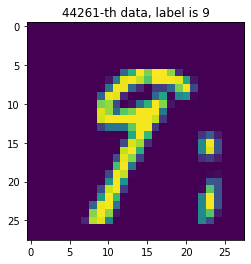

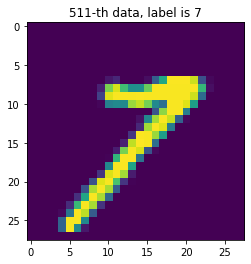

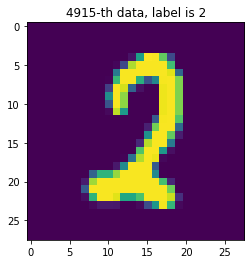

In [11]:
for idx in random_idx:
  img = x_train[idx,:]
  label = y_train[idx]
  plt.imshow(img)
  plt.title(f'{idx}-th data, label is {label}')
  plt.show()

In [12]:
x_train[0].min()

0

In [13]:
x_train[0].max()

255

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_val,y_train,y_val = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size=0.3, 
                                                      random_state=777)
print(x_train.shape,y_train.shape)

(42000, 28, 28) (42000,)


In [16]:
#모델 입력을 위한 데이터 전처리
x_train = (x_train.reshape((-1,28*28)))/255

In [17]:
x_train.shape

(42000, 784)

In [18]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [19]:
x_val = (x_val.reshape(-1,28*28))/255
x_test = (x_test.reshape(-1,28*28))/255

In [20]:
from keras.utils import to_categorical

In [21]:
to_categorical(y_train)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['acc'])

In [26]:
history = model.fit(x_train, 
                        y_train, 
                        epochs=30, 
                        batch_size=128, 
                        validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.5088 - acc: 0.8582 - val_loss: 0.2391 - val_acc: 0.9324
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1989 - acc: 0.9423 - val_loss: 0.1737 - val_acc: 0.9514
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1480 - acc: 0.9570 - val_loss: 0.1540 - val_acc: 0.9562
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1192 - acc: 0.9651 - val_loss: 0.1444 - val_acc: 0.9584
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1007 - acc: 0.9705 - val_loss: 0.1333 - val_acc: 0.9611
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.0855 - acc: 0.9743 - val_loss: 0.1150 - val_acc: 0.9657
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0747 - acc: 0.9782 - val_loss: 0.1252 - val_acc: 0.9628
Epoch 8/30
329/329 [==============================] - 1s 5ms/step - loss: 0.

In [27]:
history

In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
import matplotlib.pyplot as plt


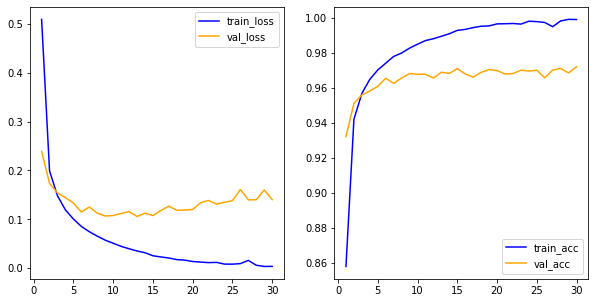

In [32]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 1번째
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.legend()

In [33]:
model.evaluate(x_test,y_test) # 평가 손실률12.5%, 정확도 97.3%

313/313 [==============================] - 1s 4ms/step - loss: 0.1254 - acc: 0.9730


[0.12540416419506073, 0.9729999899864197]

In [34]:
results = model.predict(x_test) # 예측

313/313 [==============================] - 1s 2ms/step


In [35]:
results.shape 

(10000, 10)

In [36]:
results[0]

array([5.25236876e-09, 1.17809211e-08, 2.46068544e-06, 1.26072973e-05,
       1.16124076e-10, 2.27037713e-08, 3.24818110e-18, 9.99984682e-01,
       2.36700028e-08, 1.25658246e-07], dtype=float32)

In [37]:
np.round(results[0],2) # 결과값 7의 자리

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [39]:
np.argmax(results[0])

7

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

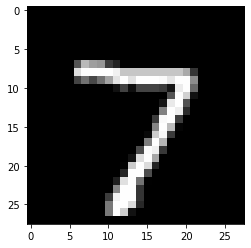

In [42]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

0 ~ 9 이미지를 폴더에서 가져온 뒤 값을 예상상해보기

In [46]:
import glob
from PIL import Image

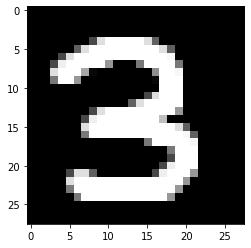

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


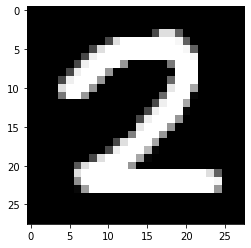

1/1 [==============================] - 0s 16ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2


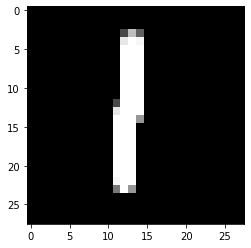

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


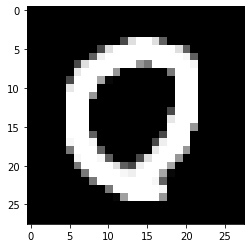

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


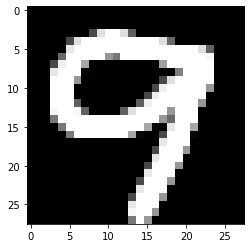

1/1 [==============================] - 0s 18ms/step
[[0.    0.    0.    0.029 0.    0.    0.    0.    0.    0.971]]
9


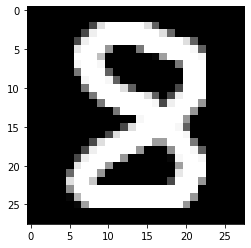

1/1 [==============================] - 0s 17ms/step
[[0.    0.    0.    0.991 0.    0.    0.    0.    0.009 0.   ]]
3


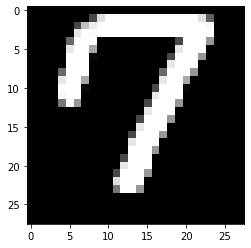

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


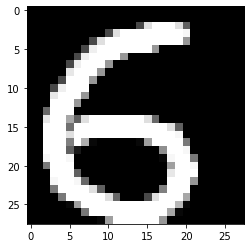

1/1 [==============================] - 0s 17ms/step
[[0.    0.    0.    0.996 0.    0.004 0.    0.    0.    0.   ]]
3


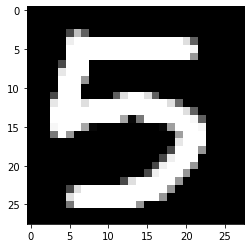

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


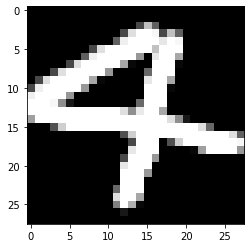

1/1 [==============================] - 0s 16ms/step
[[0.    0.    0.005 0.995 0.    0.    0.    0.    0.    0.   ]]
3


In [49]:
for path in glob.glob('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/03_mnist_img/*.png'):
  img = Image.open(path).convert('L')
  img = np.resize(img,(1,784))
  result = (255-img)/255
  plt.imshow(result.reshape(28,28),cmap='gray')
  plt.show()
  pred = model.predict(result)
  print(np.round(pred,3))
  print(np.argmax(pred))

In [50]:
model.save('mnist.h5')

In [51]:
from keras.models import load_model

In [52]:
new_model = load_model('mnist.h5')

In [54]:
np.argmax(new_model.predict(x_test)[0])

313/313 [==============================] - 1s 3ms/step


7

In [55]:
model.save_weights('mnist')

In [56]:
model1 = Sequential()
model1.add(Dense(64,activation='relu',input_shape=(784,)))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [57]:
model1.load_weights('mnist')

In [59]:
np.argmax(model1.predict(x_test)[0])

313/313 [==============================] - 1s 2ms/step


7